In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Nico Ref

In [52]:
orientacion = ['1h','2h','3h']
ref = {}
for at in ['Ridge', 'Facet', 'Valley']:
    ref[at]={}
    for orient in orientacion:
        ref[at][orient] = []

ref['Ridge']['1h'].append( np.array([6.84, 6.34, 5.84, 5.34, 4.84, 4.34, 3.84]))
ref['Ridge']['1h'].append( np.array([-155.82818,  -155.85302,  -155.88392,  -155.9206,  -155.95299,  -155.92032,  -155.32236]))
ref['Facet']['1h'].append( np.array([6.34,  5.84,  5.34,  4.84,  4.34,  3.84,  3.34]))
ref['Facet']['1h'].append( np.array([-155.84025, -155.86952, -155.90453, -155.94402, -155.97414, -155.94739, -155.75032]))
ref['Valley']['1h'].append(np.array([5.34 , 4.84 , 4.34 , 3.84 , 3.34 , 2.84 , 2.34 ]))
ref['Valley']['1h'].append(np.array([-155.88517, -155.92829, -155.97947, -156.03271, -156.06477, -156.0064, -155.70046]))
ref['Ridge']['2h'].append( np.array([6.84,  6.34,  5.84,  5.34,  4.84,  4.34,  3.84]))
ref['Ridge']['2h'].append( np.array([-155.82662, -155.85167, -155.88333, -155.92092, -155.9541, -155.93698, -155.73677]))
ref['Facet']['2h'].append( np.array([6.34,  5.84,  5.34,  4.84,  4.34,  3.84,  3.34]))
ref['Facet']['2h'].append( np.array([-155.83883, -155.86842, -155.9052, -155.94816, -155.98654, -155.98005, -155.82029]))
ref['Valley']['2h'].append(np.array([5.34,   4.84,   4.34,   3.84,   3.34,   2.84,   2.34]))
ref['Valley']['2h'].append(np.array([-155.88322, -155.92744, -155.98207, -156.04102, -156.08576, -156.05676, -155.80797]))
ref['Ridge']['3h'].append( np.array([6.84, 6.34, 5.84, 5.34, 4.84, 4.34, 3.84 ]))
ref['Ridge']['3h'].append( np.array([-155.82519, -155.84964, -155.8819, -155.92201, -155.96017, -155.95613, -155.7673]))
ref['Facet']['3h'].append( np.array([6.34, 5.84, 5.34, 4.84, 4.34, 3.84, 3.34 ]))
ref['Facet']['3h'].append( np.array([-155.8377, -155.8671, -155.90426, -155.94834, -155.98917, -155.98593, -155.82584]))
ref['Valley']['3h'].append(np.array([5.34, 4.84, 4.34, 3.84, 3.34, 2.84, 2.34 ]))
ref['Valley']['3h'].append(np.array([-155.88395, -155.92845, -155.98305, -156.04141, -156.08148, -156.04353, -155.77386]))


In [53]:
for at in ['Ridge', 'Facet', 'Valley']:
    for orient in ['1h','2h','3h']:
        ref[at][orient][1] =  ref[at][orient][1]+ 155.846302180091 

# Funciones utiles

In [65]:

Z = {
    'Ridge'  : 11.12870299,
    'Facet'  : 11.12870299,#9.96601945,
    'Valley' : 11.12870299#8.76984557
    }
paleta = {
    'Facet'  : '#93B868',
    'Ridge'  : '#DDE392',
    'Valley' : '#74795B'
    }

def plot_zone1(PATH,ax):
    df = pd.read_csv(PATH, delim_whitespace='\t')
    df['E'] = df['E_ann'] - df['E_dft'] 
    # if PATH[17:-4] == 'Valley':
    #     color = '#74795B'
    # elif PATH[17:-4] == 'Facet':
    #     color = '#93B868'
    # elif PATH[17:-4] == 'Ridge':
    #     color = '#DDE392'
    df.plot(x='Z',y='E', marker='o',ax=ax, alpha=0.9,label=PATH[17:-4])
    ax.set_title(PATH[14:-4].replace('_', ' '))
    ax.set_xlabel(f'Distancia en el eje Z [$\AA$]')
    ax.set_ylabel('$V^{ANN}$-$V^{ref}$ [eV]')
    return ax


def plot_zone2(PATH,kind,ax, label=False):
    if label:
        label = kind
    else:
        label = ''
    df = pd.read_csv(PATH, delim_whitespace='\t')
    df['E'] = df['E_ann'] - df['E_dft'] 
    df['Z_ref'] = df['Z'] - Z[kind] 
    df.query('E < 0.4 & Z_ref < 7').plot(x='Z_ref',y='E', marker='o',ax=ax, color=paleta[kind], alpha=0.9,label=label+' ANN')
    ax.set_title(kind)
    ax.set_xlabel(f'Distancia en el eje Z [$\AA$]')
    ax.set_ylabel('$V^{ANN}$-$V^{ref}$ [eV]')
    return ax

# H1

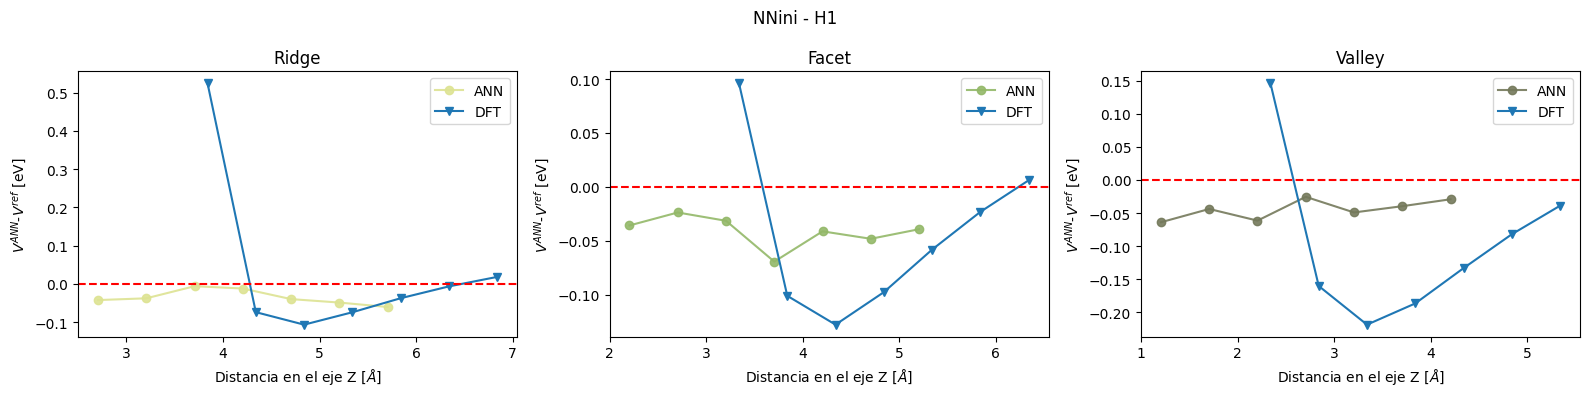

In [55]:
fig,ax = plt.subplots(1,3, figsize=(16,4))
ax[0] = plot_zone2('ZvE_ini/ZvsE_1H_down_ridge.dat' ,'Ridge'  , ax[0])
ax[1] = plot_zone2('ZvE_ini/ZvsE_1H_down_facet.dat' ,'Facet'  , ax[1])
ax[2] = plot_zone2('ZvE_ini/ZvsE_1H_down_valley.dat','Valley' , ax[2])


ax[0].plot( ref['Ridge'][orientacion[0]][0],ref['Ridge'][orientacion[0]][1] , marker='v', label ='DFT')
ax[1].plot( ref['Facet'][orientacion[0]][0],ref['Facet'][orientacion[0]][1] , marker='v', label ='DFT')
ax[2].plot(ref['Valley'][orientacion[0]][0],ref['Valley'][orientacion[0]][1], marker='v', label ='DFT')
ax[0].axhline(y=0, color='red', linestyle='--')
ax[1].axhline(y=0, color='red', linestyle='--')
ax[2].axhline(y=0, color='red', linestyle='--')
ax[0].legend()
ax[1].legend()
ax[2].legend()
fig.suptitle('NNini - H1')
fig.tight_layout()
plt.show()

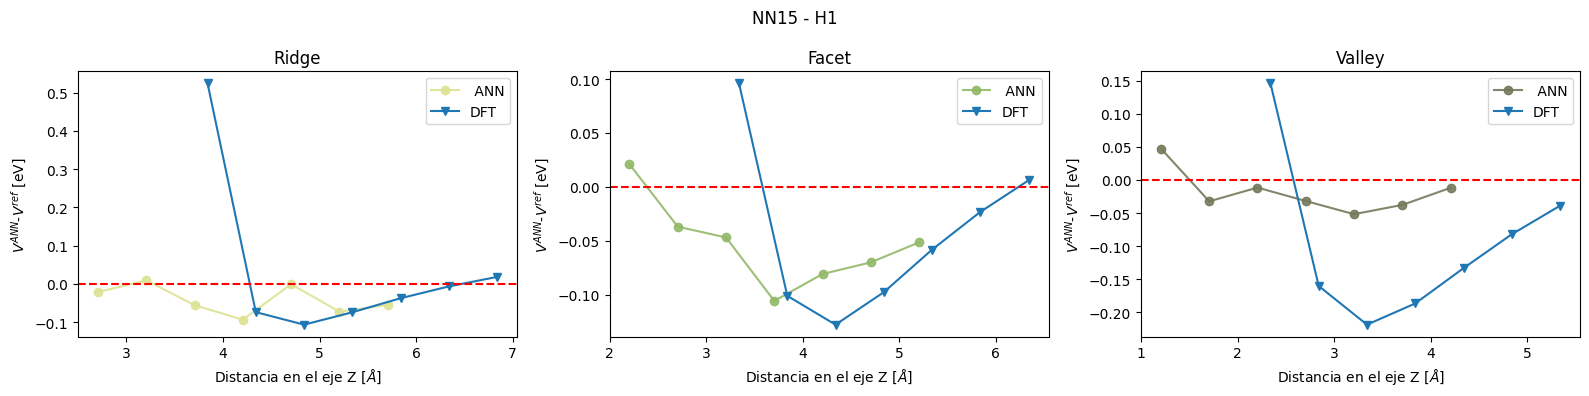

In [75]:
fig,ax = plt.subplots(1,3, figsize=(16,4))
ax[0] = plot_zone2('ZvE_15/ZvsE_1H_down_ridge.dat' ,'Ridge' , ax[0])
ax[1] = plot_zone2('ZvE_15/ZvsE_1H_down_facet.dat' ,'Facet' , ax[1])
ax[2] = plot_zone2('ZvE_15/ZvsE_1H_down_valley.dat','Valley' , ax[2])

# ax[0] = plot_zone2( 'calculos_hasta_z-12/ZvsE_H1_Ridge.dat' ,'Ridge' , ax[0])
# ax[1] = plot_zone2( 'calculos_hasta_z-12/ZvsE_H1_Facet.dat' ,'Facet' , ax[1])
# ax[2] = plot_zone2('calculos_hasta_z-12/ZvsE_H1_Valley.dat','Valley' , ax[2])

ax[0].plot( ref['Ridge'][orientacion[0]][0],ref['Ridge'][orientacion[0]][1] , marker='v', label ='DFT')
ax[1].plot( ref['Facet'][orientacion[0]][0],ref['Facet'][orientacion[0]][1] , marker='v', label ='DFT')
ax[2].plot(ref['Valley'][orientacion[0]][0],ref['Valley'][orientacion[0]][1], marker='v', label ='DFT')
ax[0].axhline(y=0, color='red', linestyle='--')
ax[1].axhline(y=0, color='red', linestyle='--')
ax[2].axhline(y=0, color='red', linestyle='--')
ax[0].legend()
ax[1].legend()
ax[2].legend()
fig.suptitle('NN15 - H1')
fig.tight_layout()
plt.show()

# H2

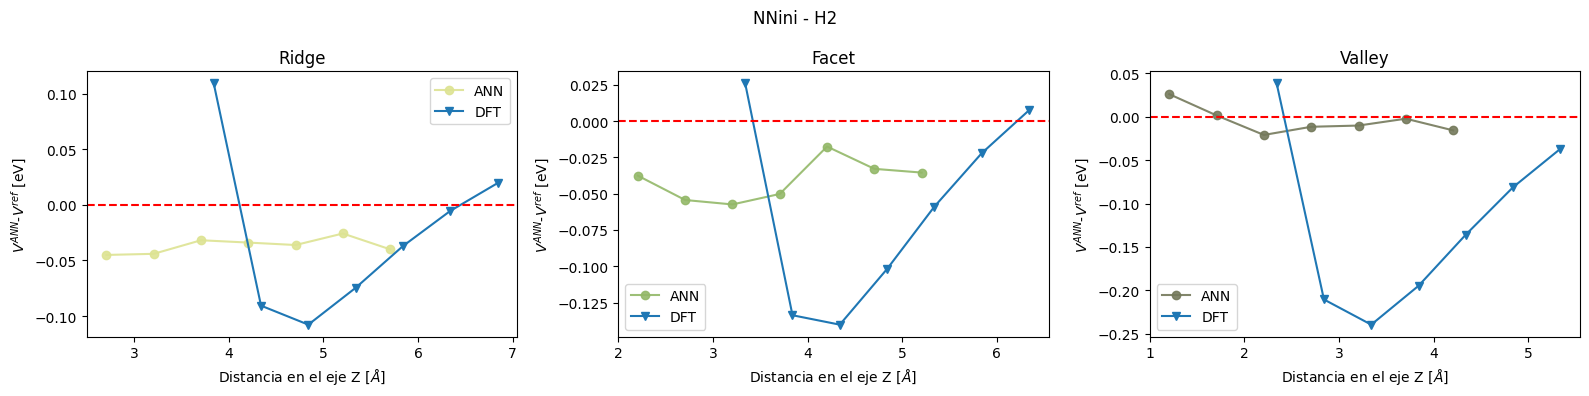

In [57]:
fig,ax = plt.subplots(1,3, figsize=(16,4))
ax[0] = plot_zone2('ZvE_ini/ZvsE_2H_down_ridge.dat', 'Ridge' , ax[0])
ax[1] = plot_zone2('ZvE_ini/ZvsE_2H_down_facet.dat', 'Facet' , ax[1])
ax[2] = plot_zone2('ZvE_ini/ZvsE_2H_down_valley.dat','Valley' , ax[2])

ax[0].plot( ref['Ridge'][orientacion[1]][0],ref['Ridge'][orientacion[1]][1] , marker='v', label ='DFT')
ax[1].plot( ref['Facet'][orientacion[1]][0],ref['Facet'][orientacion[1]][1] , marker='v', label ='DFT')
ax[2].plot(ref['Valley'][orientacion[1]][0],ref['Valley'][orientacion[1]][1], marker='v', label ='DFT')

ax[0].axhline(y=0, color='red', linestyle='--')
ax[1].axhline(y=0, color='red', linestyle='--')
ax[2].axhline(y=0, color='red', linestyle='--')
ax[0].legend()
ax[1].legend()
ax[2].legend()

fig.suptitle('NNini - H2')
fig.tight_layout()
plt.show()

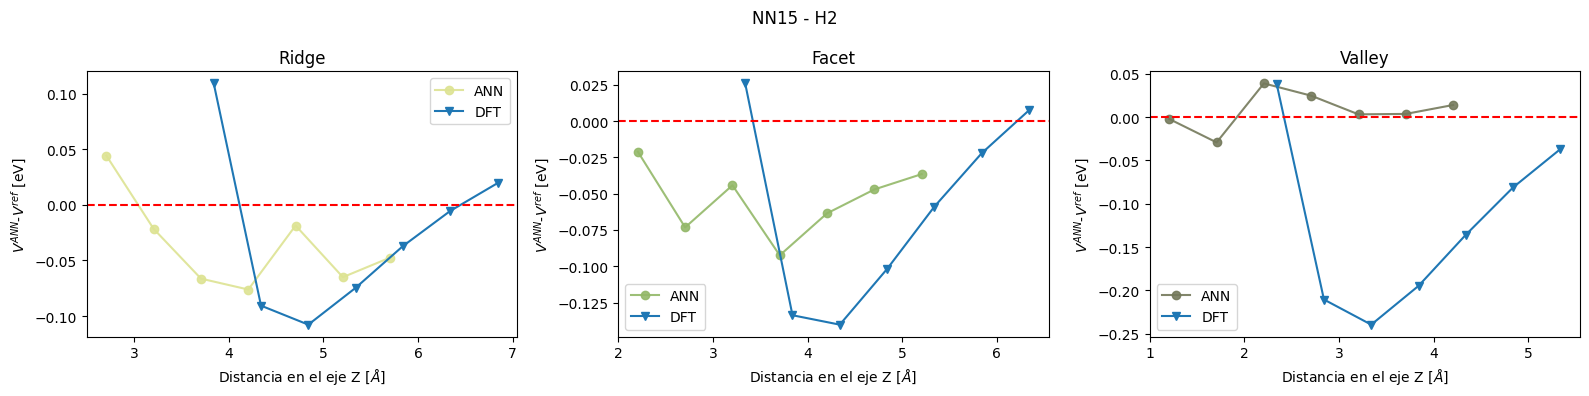

In [58]:
fig,ax = plt.subplots(1,3, figsize=(16,4))
ax[0] = plot_zone2('ZvE_15/ZvsE_2H_down_ridge.dat', 'Ridge' , ax[0])
ax[1] = plot_zone2('ZvE_15/ZvsE_2H_down_facet.dat', 'Facet' , ax[1])
ax[2] = plot_zone2('ZvE_15/ZvsE_2H_down_valley.dat','Valley' , ax[2])

ax[0].plot( ref['Ridge'][orientacion[1]][0],ref['Ridge'][orientacion[1]][1] , marker='v', label ='DFT')
ax[1].plot( ref['Facet'][orientacion[1]][0],ref['Facet'][orientacion[1]][1] , marker='v', label ='DFT')
ax[2].plot(ref['Valley'][orientacion[1]][0],ref['Valley'][orientacion[1]][1], marker='v', label ='DFT')

ax[0].axhline(y=0, color='red', linestyle='--')
ax[1].axhline(y=0, color='red', linestyle='--')
ax[2].axhline(y=0, color='red', linestyle='--')
ax[0].legend()
ax[1].legend()
ax[2].legend()

fig.suptitle('NN15 - H2')
fig.tight_layout()
plt.show()

# H3

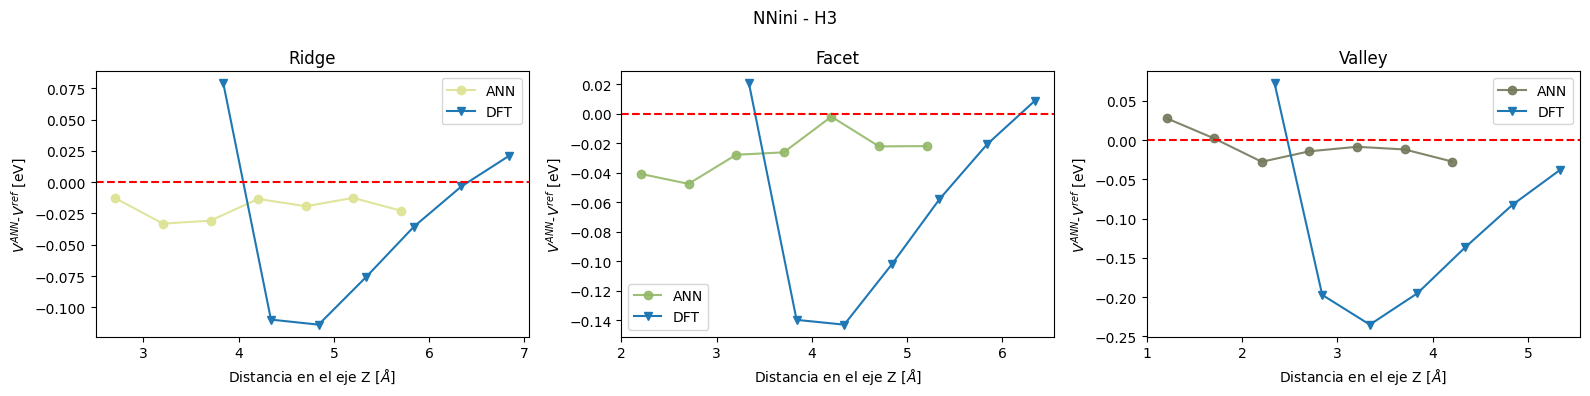

In [59]:
fig,ax = plt.subplots(1,3, figsize=(16,4))
ax[0] = plot_zone2('ZvE_ini/ZvsE_3H_down_ridge.dat', 'Ridge' , ax[0])
ax[1] = plot_zone2('ZvE_ini/ZvsE_3H_down_facet.dat', 'Facet' , ax[1])
ax[2] = plot_zone2('ZvE_ini/ZvsE_3H_down_valley.dat','Valley' , ax[2])

ax[0].plot( ref['Ridge'][orientacion[2]][0],ref['Ridge'][orientacion[2]][1] , marker='v', label ='DFT')
ax[1].plot( ref['Facet'][orientacion[2]][0],ref['Facet'][orientacion[2]][1] , marker='v', label ='DFT')
ax[2].plot(ref['Valley'][orientacion[2]][0],ref['Valley'][orientacion[2]][1], marker='v', label ='DFT')
ax[0].axhline(y=0, color='red', linestyle='--')
ax[1].axhline(y=0, color='red', linestyle='--')
ax[2].axhline(y=0, color='red', linestyle='--')
ax[0].legend()
ax[1].legend()
ax[2].legend()

fig.suptitle('NNini - H3')
fig.tight_layout()
plt.show()

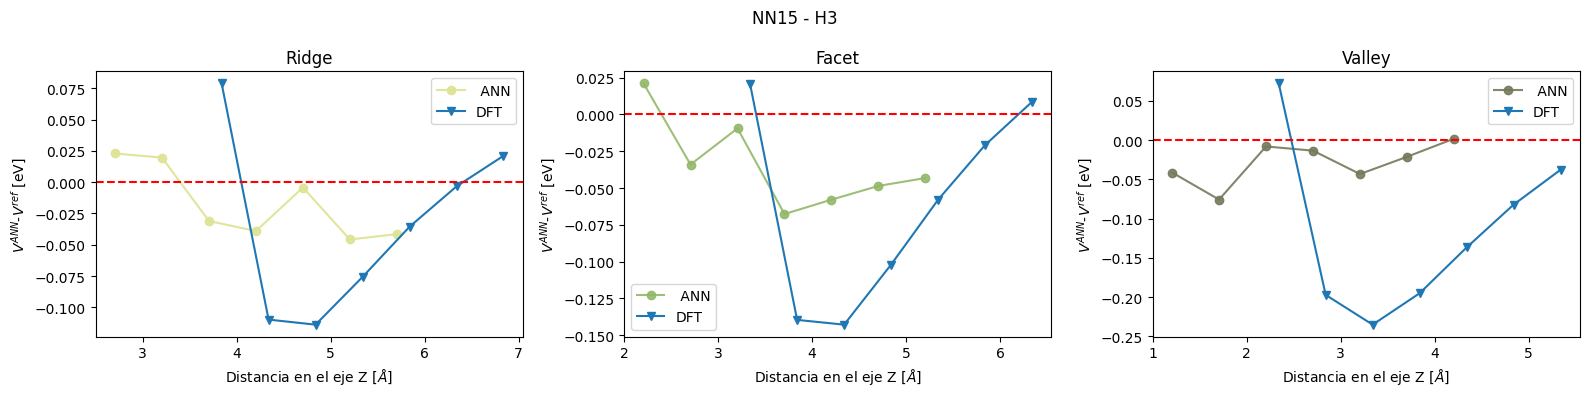

In [72]:
fig,ax = plt.subplots(1,3, figsize=(16,4))
ax[0] = plot_zone2('ZvE_15/ZvsE_3H_down_ridge.dat', 'Ridge' , ax[0])
ax[1] = plot_zone2('ZvE_15/ZvsE_3H_down_facet.dat', 'Facet' , ax[1])
ax[2] = plot_zone2('ZvE_15/ZvsE_3H_down_valley.dat','Valley' , ax[2])

ax[0].plot( ref['Ridge'][orientacion[2]][0],ref['Ridge'][orientacion[2]][1] , marker='v', label ='DFT')
ax[1].plot( ref['Facet'][orientacion[2]][0],ref['Facet'][orientacion[2]][1] , marker='v', label ='DFT')
ax[2].plot(ref['Valley'][orientacion[2]][0],ref['Valley'][orientacion[2]][1], marker='v', label ='DFT')
ax[0].axhline(y=0, color='red', linestyle='--')
ax[1].axhline(y=0, color='red', linestyle='--')
ax[2].axhline(y=0, color='red', linestyle='--')
ax[0].legend()
ax[1].legend()
ax[2].legend()

fig.suptitle('NN15 - H3')
fig.tight_layout()
plt.show()

# superpuestos

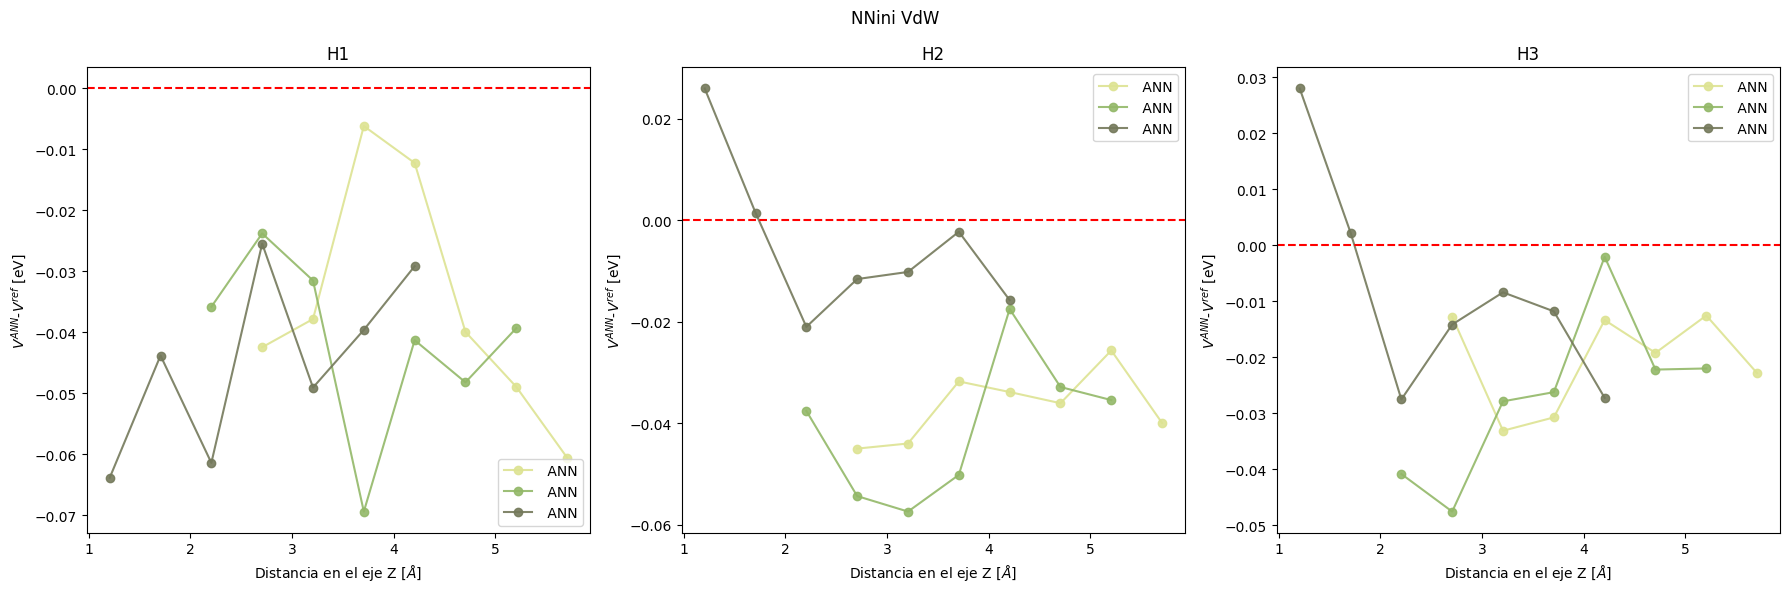

In [70]:
fig,ax = plt.subplots(1,3, figsize=(18,6))
ax[0] = plot_zone2('ZvE_ini/ZvsE_1H_down_ridge.dat' ,'Ridge', ax[0])
ax[0] = plot_zone2('ZvE_ini/ZvsE_1H_down_facet.dat' ,'Facet', ax[0])
ax[0] = plot_zone2('ZvE_ini/ZvsE_1H_down_valley.dat','Valley', ax[0])
ax[1] = plot_zone2('ZvE_ini/ZvsE_2H_down_ridge.dat' ,'Ridge', ax[1])
ax[1] = plot_zone2('ZvE_ini/ZvsE_2H_down_facet.dat' ,'Facet', ax[1])
ax[1] = plot_zone2('ZvE_ini/ZvsE_2H_down_valley.dat','Valley', ax[1])
ax[2] = plot_zone2('ZvE_ini/ZvsE_3H_down_ridge.dat' ,'Ridge', ax[2])
ax[2] = plot_zone2('ZvE_ini/ZvsE_3H_down_facet.dat' ,'Facet', ax[2])
ax[2] = plot_zone2('ZvE_ini/ZvsE_3H_down_valley.dat','Valley', ax[2])

ax[0].axhline(y=0, color='red', linestyle='--')
ax[1].axhline(y=0, color='red', linestyle='--')
ax[2].axhline(y=0, color='red', linestyle='--')
ax[0].set_title('H1')
ax[1].set_title('H2')
ax[2].set_title('H3')
fig.suptitle('NNini VdW')
fig.tight_layout()
plt.show()

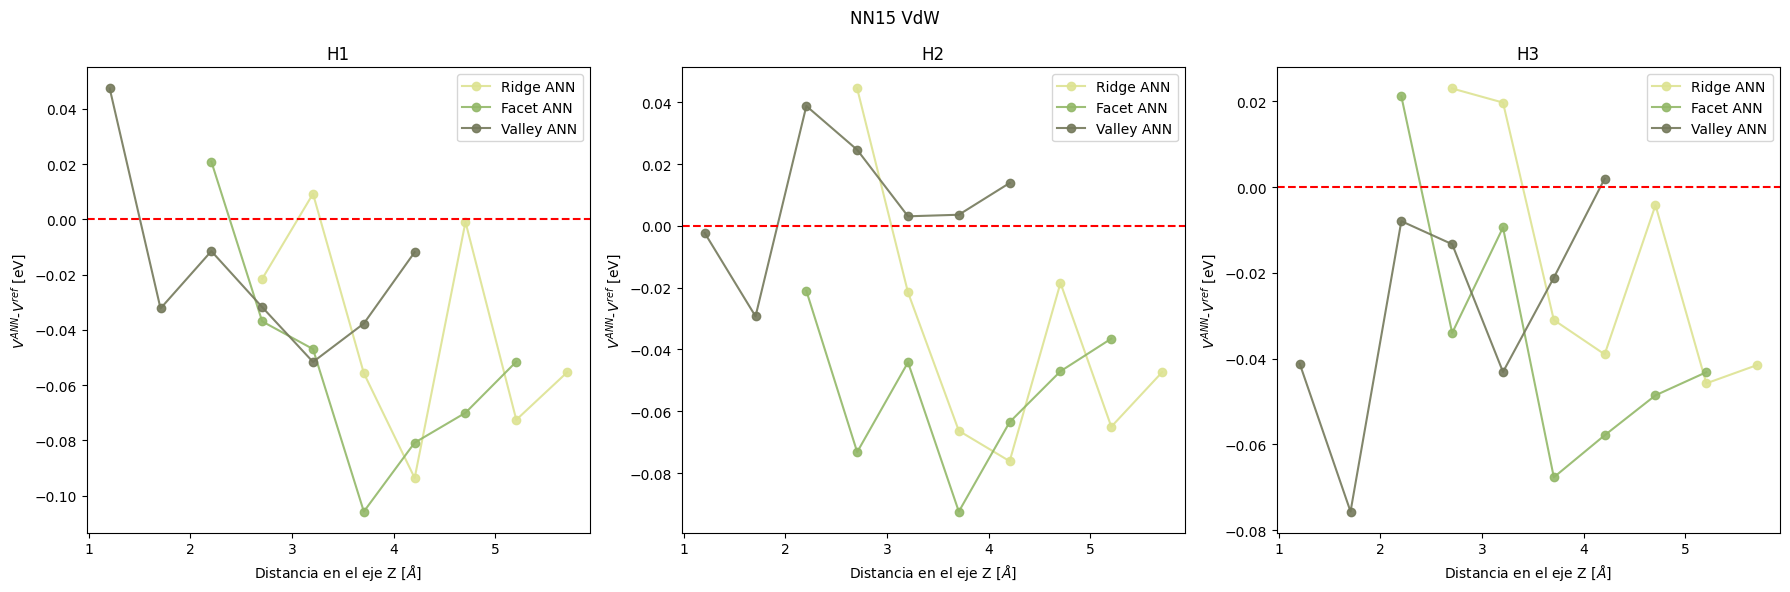

In [69]:
fig,ax = plt.subplots(1,3, figsize=(18,6))
ax[0] = plot_zone2('ZvE_15/ZvsE_1H_down_ridge.dat' ,'Ridge', ax[0], True )
ax[0] = plot_zone2('ZvE_15/ZvsE_1H_down_facet.dat' ,'Facet', ax[0], True )
ax[0] = plot_zone2('ZvE_15/ZvsE_1H_down_valley.dat','Valley', ax[0], True )
ax[1] = plot_zone2('ZvE_15/ZvsE_2H_down_ridge.dat' ,'Ridge', ax[1], True )
ax[1] = plot_zone2('ZvE_15/ZvsE_2H_down_facet.dat' ,'Facet', ax[1], True )
ax[1] = plot_zone2('ZvE_15/ZvsE_2H_down_valley.dat','Valley', ax[1], True )
ax[2] = plot_zone2('ZvE_15/ZvsE_3H_down_ridge.dat' ,'Ridge', ax[2], True )
ax[2] = plot_zone2('ZvE_15/ZvsE_3H_down_facet.dat' ,'Facet', ax[2], True )
ax[2] = plot_zone2('ZvE_15/ZvsE_3H_down_valley.dat','Valley', ax[2], True )

ax[0].axhline(y=0, color='red', linestyle='--')
ax[1].axhline(y=0, color='red', linestyle='--')
ax[2].axhline(y=0, color='red', linestyle='--')
ax[0].set_title('H1')
ax[1].set_title('H2')
ax[2].set_title('H3')
fig.suptitle('NN15 VdW')
fig.tight_layout()
plt.show()